# Data Loading and Understanding

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import re

In [118]:
loan = pd.read_csv("loan.csv", sep=",",encoding = "ISO-8859-1",low_memory = False)
#Information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [119]:
#Get number of rows and columns in the dataset

print("Shape of the dataset : ", loan.shape,"\n")
print("Columns of the dataset : ")
loan.columns

Shape of the dataset :  (39717, 111) 

Columns of the dataset : 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning 

In [120]:
#get columns with null values
null_columns = loan.columns[loan.isnull().any()]

print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan[null_columns].isnull().sum()/len(loan.index))*100

print("Percentage of null values in each columns : \n",null_count)

Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_12

In [121]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)
loan_df = loan.drop(missing_columns, axis=1)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [122]:
print("Column details after removing null values")
print("=============================================")
print("Shape of the dataset : ",loan_df.shape)
#get columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]
print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan_df[null_columns].isnull().sum()/len(loan_df.index))*100
print("Percentage of null values in each columns : \n",null_count)

Column details after removing null values
Shape of the dataset :  (39717, 55)
Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object') 


Percentage of null values in each columns : 
 emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64



<li>We could see there were 39717 rows and 111 columns in the given dataset.
<li>Out of 111 columns, there are lots of columns 90 % + rows having only NA values which will not be useful for analysis.
<li>We removed the columns with NA values and those are not contributing to the analysis.

In [123]:
#seeing the dataset after dropping the columns with 90% NA values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [124]:
#checking categorical variables and see for useful info
unique_columns = loan_df.columns[loan_df.nunique(dropna=False) < 10]

for i in range(0,len(unique_columns)):
  print("Column: ",unique_columns[i],"having unique values: ",loan_df[unique_columns[i]].unique())

Column:  term having unique values:  [' 36 months' ' 60 months']
Column:  grade having unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Column:  home_ownership having unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Column:  verification_status having unique values:  ['Verified' 'Source Verified' 'Not Verified']
Column:  loan_status having unique values:  ['Fully Paid' 'Charged Off' 'Current']
Column:  pymnt_plan having unique values:  ['n']
Column:  inq_last_6mths having unique values:  [1 5 2 0 3 4 6 7 8]
Column:  pub_rec having unique values:  [0 1 2 3 4]
Column:  initial_list_status having unique values:  ['f']
Column:  collections_12_mths_ex_med having unique values:  [ 0. nan]
Column:  policy_code having unique values:  [1]
Column:  application_type having unique values:  ['INDIVIDUAL']
Column:  acc_now_delinq having unique values:  [0]
Column:  chargeoff_within_12_mths having unique values:  [ 0. nan]
Column:  delinq_amnt having unique values:  [0]
Column:  pub_rec_bankrupt

In [125]:
#Drop columns having only one categorical value
drop_cols = [c for c in list(loan_df) if loan_df[c].nunique() <= 1]
#print(drop_cols)
loan_df = loan_df.drop(columns=drop_cols)

###  Dropping Customer behaviour variables based on the guidance given during query resolution session
These values will not be available at the point of decision making hence not relevant

In [126]:
behaviour_var =  ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",    
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
loan_df = loan_df.drop(behaviour_var, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [127]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
desc                      32.58
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
mths_since_last_delinq    64.66
pub_rec_bankruptcies       1.75
dtype: float64

In [128]:
#seeing data for desc and mths_since_last_delinq columns which has 32.6% and 64.7% missin values respectively
loan_df.loc[:,['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


<li> Desc and mths_since_last_delinq column can be removed from analysis since it is not having relevant information.
<li>Removing some customer variables which are not used for analysis.

In [129]:
#Removing other irrelenant columns
loan_df = loan_df.drop(columns=['id','member_id','mths_since_last_delinq','desc','emp_title','url','title','zip_code'], inplace=False)

In [130]:

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

### Dropping rows with loan status as  Curent
Since we are only concerned about the loans that were defaulted and the ones that were paid in full , we can ignore the existing loans. So Drop all rows where the status is 'Current'

In [131]:
#Removing rows which has loan_status as current
loan_df.drop(loan_df[(loan_df['loan_status'] == 'Current')].index, inplace=True)

In [132]:
#Seeing number of rows and columns after clean up
loan_df.shape

(38577, 18)

After dropping the irrelavant columns and rows, finally our dataset has 38577 rows and 18 columns for analysis.

## Null value treatment

In [134]:
#seeing missing values for all the coulmns
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.81
dtype: float64

### Variable : Emp_Length 

In [135]:
#seeing the values present in the emp_length column
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [136]:
#fill null values as 0
loan_df['emp_length'].fillna(0,inplace=True)

### Variable : pub_rec_bankruptcies 

In [137]:
#seeing values present in the column
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [138]:
# fill null values with -1 
loan_df['pub_rec_bankruptcies'].fillna(-1,inplace=True)

In [139]:
# checking whether some rows have more than 5 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

### Manipulating data types of columns and values where necessary

In [140]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [142]:
#converting to int by removing years from emp_length
loan_df.emp_length = loan_df['emp_length'].apply(lambda x: re.split(r'(\d+)',str(x))[1]).astype('int64')

In [143]:
loan_df['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

In [144]:
#Removing months from term column and converting to int
loan_df['term'] = loan_df['term'].str.replace(r'months','').astype('int64')

In [145]:
#converting to float : Interest Rate
loan_df.int_rate = loan_df.int_rate.str.strip('%.').astype('float').round(2)

In [146]:
#Rounding float
loan_df.funded_amnt_inv=round(loan_df.funded_amnt_inv, 2)

In [147]:
# Coverting Dates to date time format 
loan_df.issue_d=pd.to_datetime(loan_df.issue_d, format='%b-%y', errors='ignore')

In [148]:
# extracting month and year from issue_date
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [149]:
#Dropped issue_d column
loan_df.drop(['issue_d'], axis=1, inplace=True)

In [150]:
# Funded to income ratio 
loan_df['funded_to_income']=(loan_df['funded_amnt']*100/loan_df['annual_inc']).astype(int)

In [151]:
#Converting loan_status to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1).astype(int)

In [152]:
loan_df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### Creating Data Bins

In [153]:
#Fundend Amount Bins : 1000s
loan_df['funded_amnt_bins'] = pd.cut(x=loan_df['funded_amnt']/1000, bins=[0,1,2,3,4,5,10,15,20,25,30,35], 
                    labels=['0-1K','1K-2K','2K-3K','3K-4K','4K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']) 

In [154]:
# Funded to income ratio 
loan_df['funded_to_income']=(loan_df['funded_amnt']*100/loan_df['annual_inc']).astype(int)

In [246]:
loan_df.funded_to_income.describe()

count    38577.00000
mean        17.76346
std         11.23865
min          0.00000
25%          9.00000
50%         16.00000
75%         24.00000
max         83.00000
Name: funded_to_income, dtype: float64

In [247]:
# Funded to income Bins
loan_df['funded_to_income_bins'] = pd.cut(x=loan_df['funded_to_income'], bins=[0,10,20,30,40,50,60,70,80,90,100], 
                    labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']) 

In [248]:
# Interest rate Bins
loan_df['int_rate_bins'] = pd.cut(x=loan_df['int_rate'], bins=[5,7,9,11,13,15,17,19,21,23,25], 
                    labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25']) 


In [249]:
# DTI Bins
loan_df['dti_bins'] = pd.cut(x=loan_df['dti'], bins=[0,3,6,9,12,15,18,21,24,27,30], 
                    labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27-30']) 

In [250]:
# Funded Amount INV Bins
loan_df['funded_amnt_inv_bins'] = pd.cut(x=loan_df['funded_amnt_inv']/1000, bins=[0,1,2,3,4,5,10,15,20,25,30,36], 
                    labels=['0-1K','1K-2K','2K-3K','3K-4K','4K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']) 

In [251]:
# DTI only 5 Bins
loan_df['dti_5_bins'] = pd.cut(x=loan_df['dti'], bins=[0,5,10,15,20,25,30], 
                    labels=['0-5','5-10','10-15','15-20','20-25','25-30']) 


In [252]:
# Annual Income Bins
loan_df['annual_inc_bins'] = pd.cut(x=loan_df['annual_inc']/1000, bins=[0,10,20,50,100,200,500,1000,2000,5000,100000], 
                    labels=['0-10K','10K-20K','20K-50K','50K-100K','100K-200K','200K-500K','500K-1000K','1000K-2000K','2000K-5000K','5000K+']) 

In [253]:
# Installments Bins
loan_df['installment_bins'] = pd.cut(x=loan_df['installment']/100, bins=[0,1,2,3,4,5,10,15,20,25,30,50], 
                    labels=['0-100','100-200','200-300','300-400','400-500','500-1k','1K-1.5K','1.5K-2K','2K-2.5K','2.5K-3K','3K+']) 

In [254]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 20428
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              38577 non-null  int64   
 1   funded_amnt            38577 non-null  int64   
 2   funded_amnt_inv        38577 non-null  float64 
 3   term                   38577 non-null  int64   
 4   int_rate               38577 non-null  float64 
 5   installment            38577 non-null  float64 
 6   grade                  38577 non-null  object  
 7   sub_grade              38577 non-null  object  
 8   emp_length             38577 non-null  int64   
 9   home_ownership         38577 non-null  object  
 10  annual_inc             38577 non-null  float64 
 11  verification_status    38577 non-null  object  
 12  loan_status            38577 non-null  int32   
 13  purpose                38577 non-null  object  
 14  addr_state             38577 non-null 

# Data Analysis

### Reusable plotting related functions 

In [255]:
## Show labels in bar plots - copied from https://stackoverflow.com/a/48372659 
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "% \nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [268]:

def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 1)].groupby([plotby]).loan_status.count()
    #print(charged_off)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = charged_off * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.sort_values().plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()


In [269]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(10, 4))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 16))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return showLabels(ax)

In [270]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
  #   plt.figure(figsize=(15, 10))
    for idx, val in enumerate(arr, start=1):
      #  plt.figure(figsize=(15, 10))
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().sort_values().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax)

    plt.tight_layout()
    

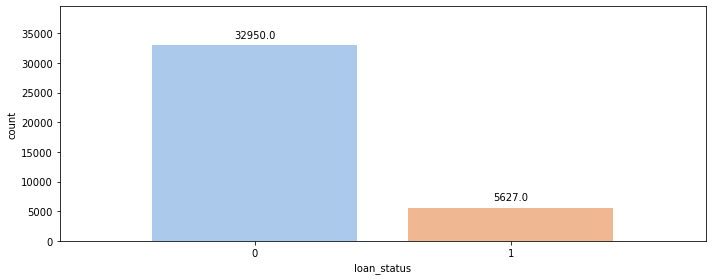

In [271]:
count_plot(loan_df,'loan_status')
plt.show()

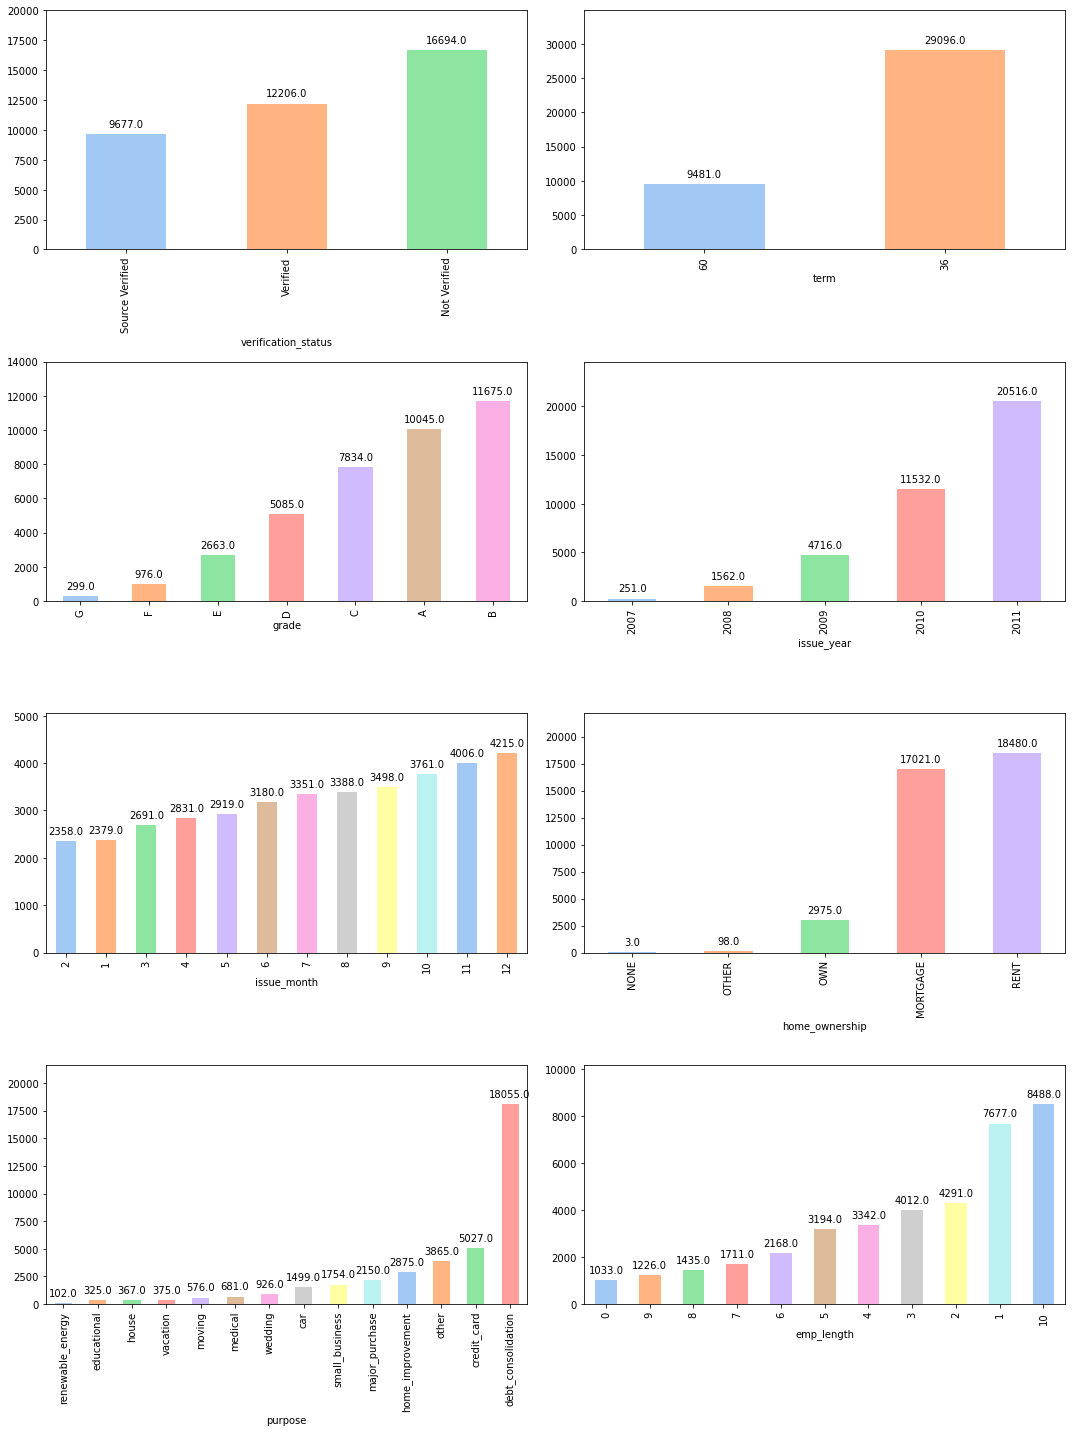

In [272]:
plt.figure(figsize=(15,20))

categoricalBarPlots(loan_df, ['verification_status','term','grade','issue_year','issue_month','home_ownership','purpose','emp_length'])


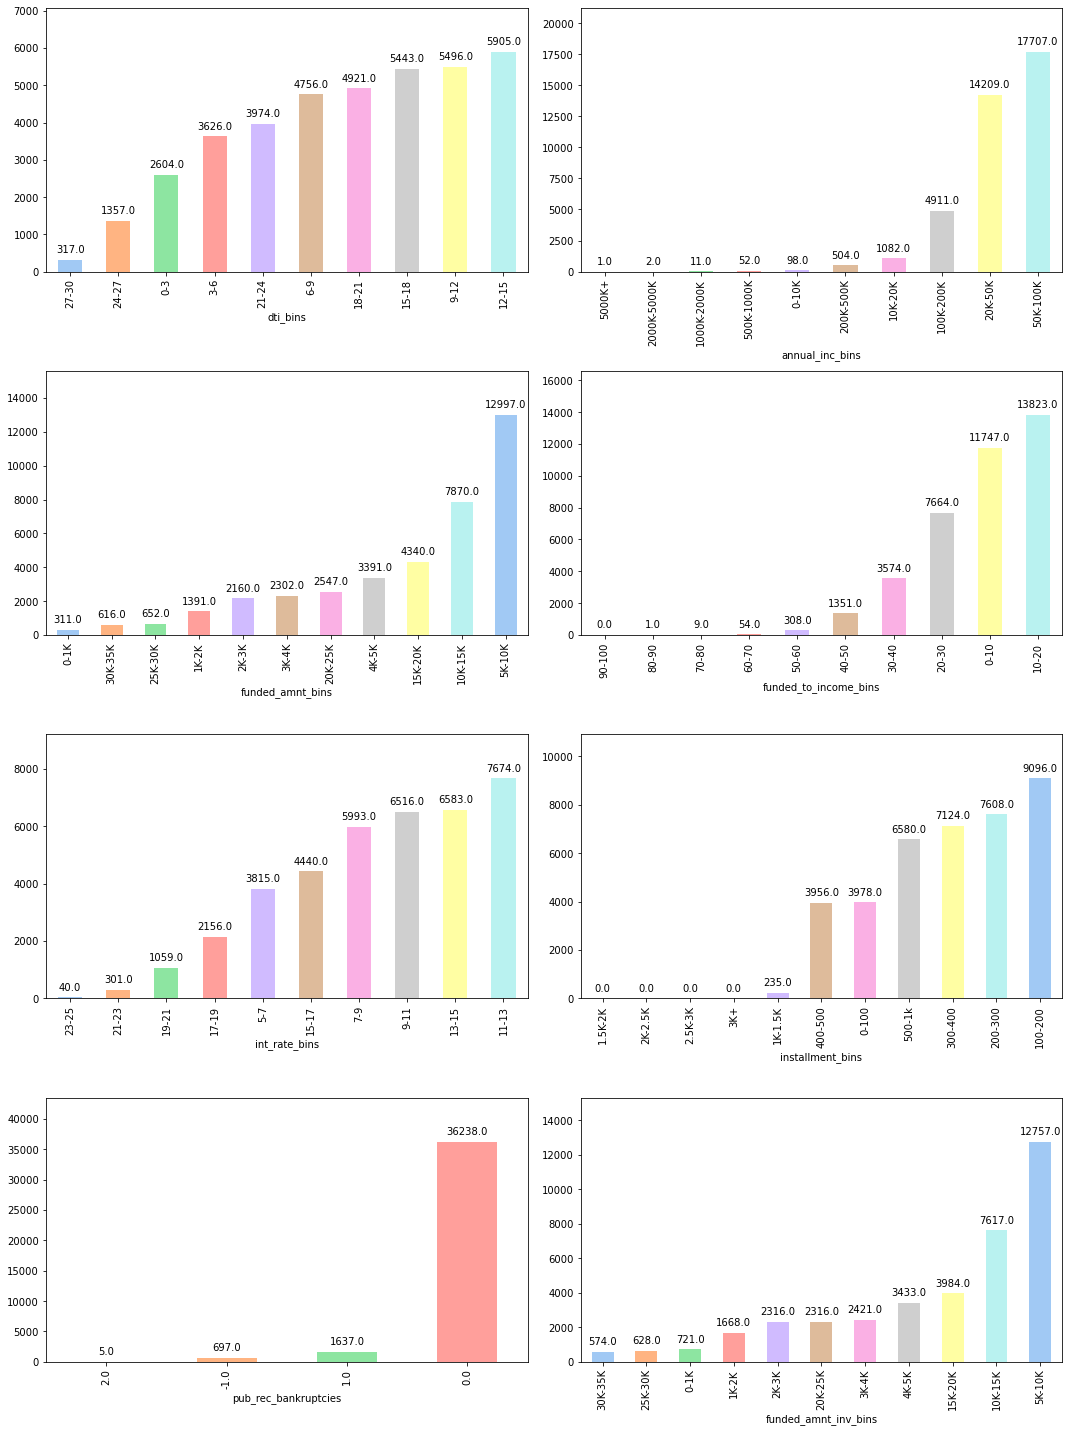

In [273]:
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, ['dti_bins','annual_inc_bins','funded_amnt_bins','funded_to_income_bins','int_rate_bins','installment_bins','pub_rec_bankruptcies','funded_amnt_inv_bins'])


In [274]:
round(loan_df.loc[loan_df.loan_status == 1].loan_status.count()/ len(loan_df) * 100 , 2)

14.59

## Charged off to total loans ratio = 14.59 % , Setting average default line as 15% based on the same 
Any variable with percentage of default higher than 15% should be considered a business risk.

In [275]:
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,10112.837431,6901.840873,0.0,5000.0,8500.00,13950.0,35000.0
1,5627.0,10864.521299,7661.750567,0.0,5000.0,9401.21,15000.0,35000.0


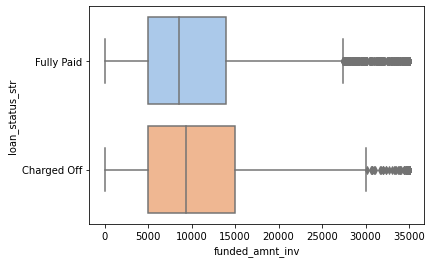

In [276]:
loan_df['loan_status_str'] = loan_df['loan_status'].apply(lambda x: 'Fully Paid' if x == 0 else "Charged Off").astype(str)

sns.boxplot(x=loan_df['funded_amnt_inv'], y = loan_df['loan_status_str'], data=loan_df, palette=sns.color_palette('pastel', 16))
plt.show()

#### Inference : Box plot depict Charged off mean and 75 percentile slightly higher as compared to fully paid : Higher the funded amount invested ther are slightly higher chances of delinquency  

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


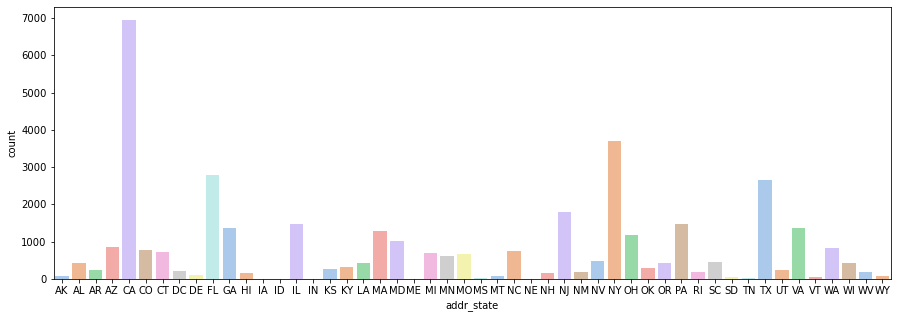

In [277]:

plt.figure(figsize=(15,5))

sns.countplot(loan_df['addr_state'].sort_values(),palette=sns.color_palette('pastel', 16), order=sorted(loan_df.addr_state.unique()))

plt.show()


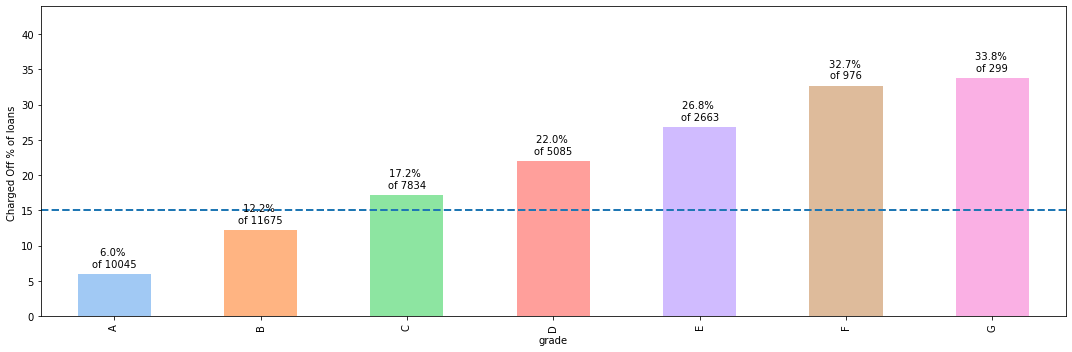

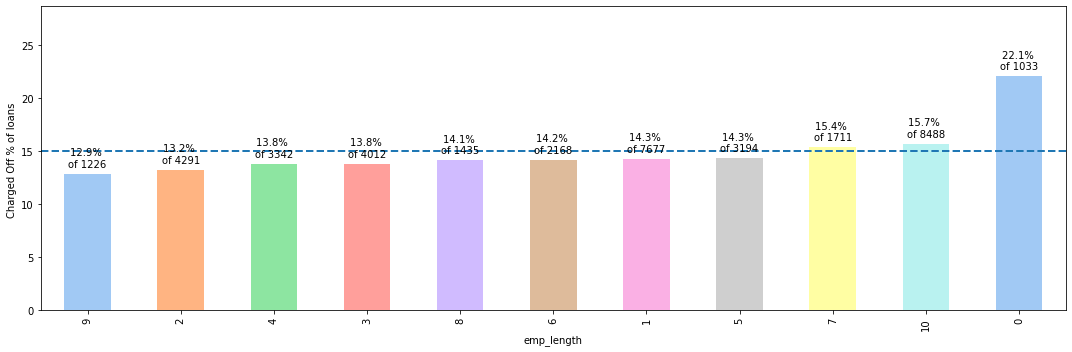

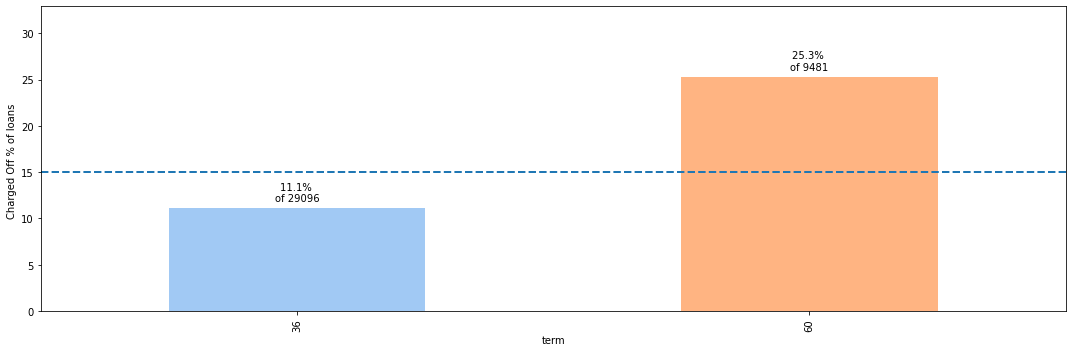

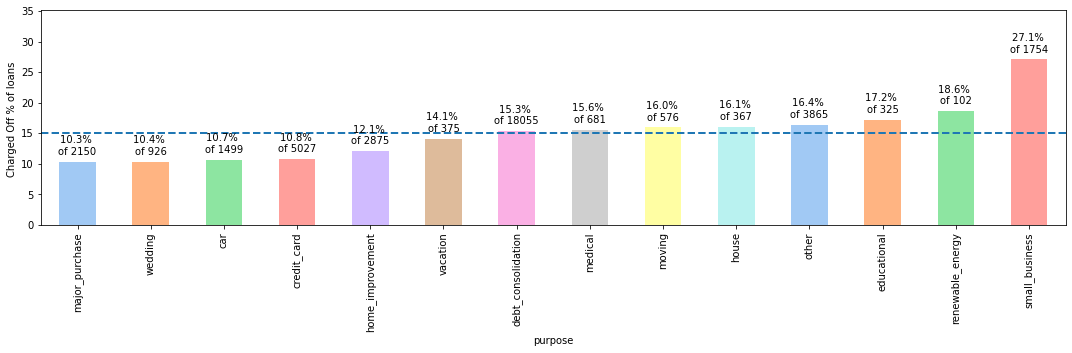

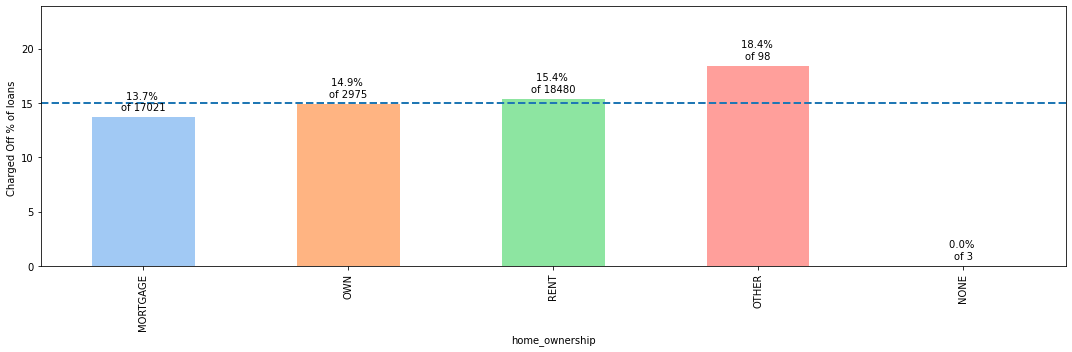

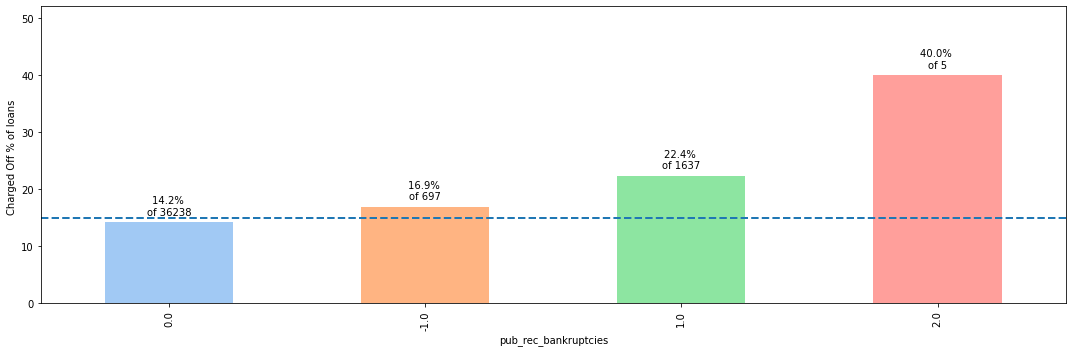

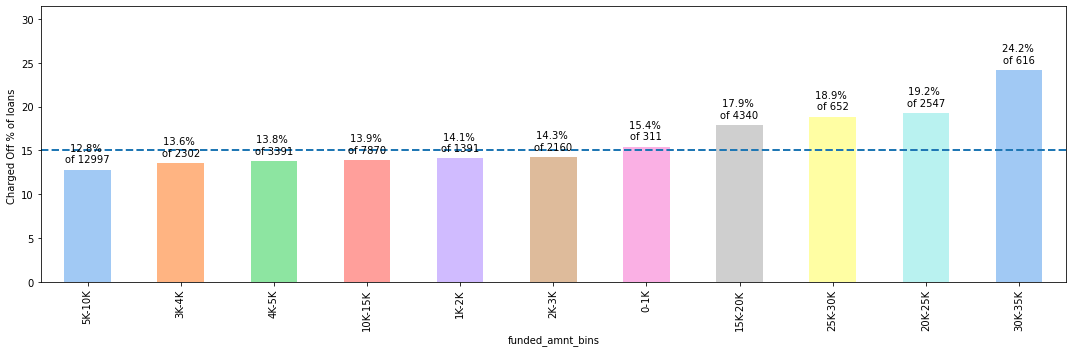

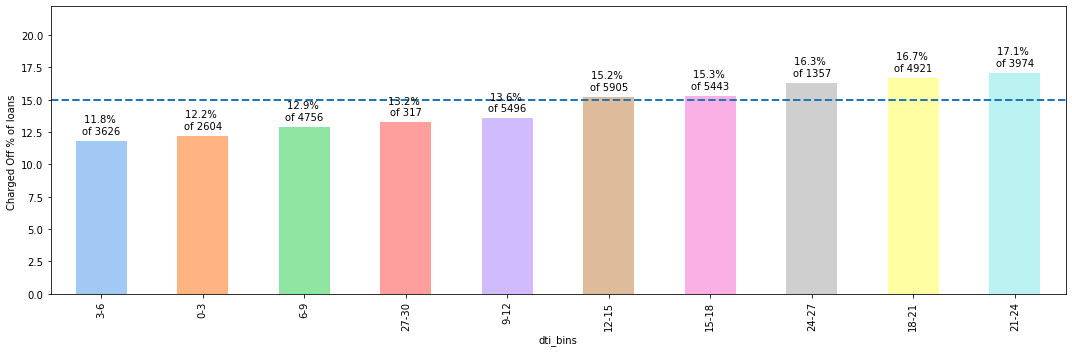

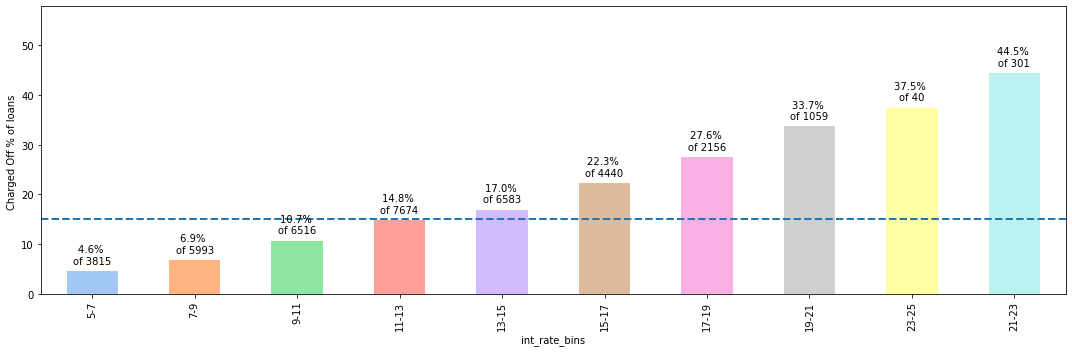

In [279]:
col_names = ['grade','emp_length','term','purpose','home_ownership','pub_rec_bankruptcies','funded_amnt_bins','dti_bins','int_rate_bins']

rows = len(col_names)

for idx,col in enumerate(col_names,start=1):
  plot_charged_off(loan_df, col)
plt.tight_layout()

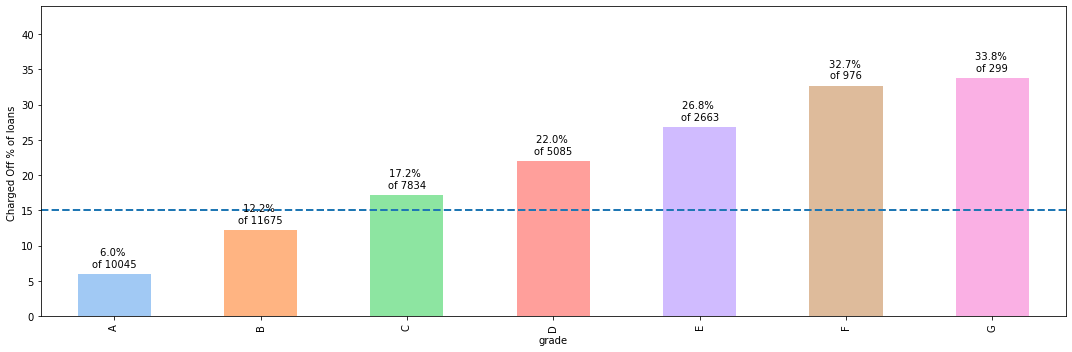

In [245]:
plot_charged_off(loan_df, 'grade')

#### Inference : Grade 
<li> As Grade increases from A to G resepctive risk of default increases. 
<li> Grade C to G are grades with the risk higher than threshold. 
<li> Grade G has highest risk     

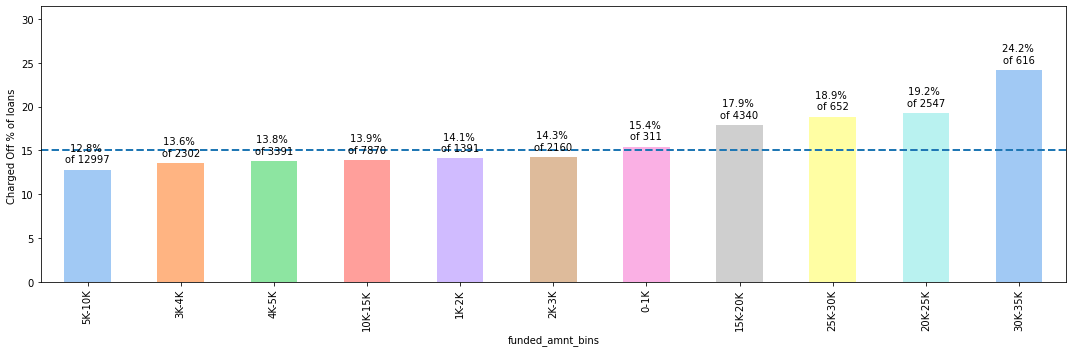

In [98]:
plot_charged_off(loan_df, 'funded_amnt_bins')

#### Inference : Funded Amount
<li> Loan amount . 
<li> 
<li>  

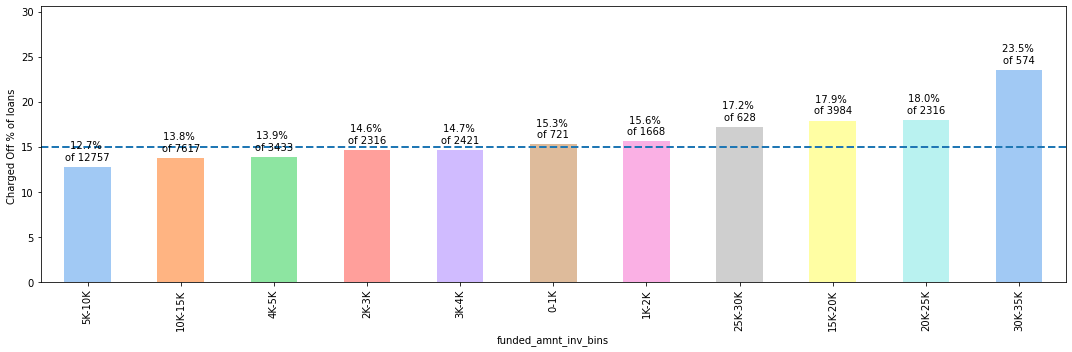

In [99]:
plot_charged_off(loan_df, 'funded_amnt_inv_bins')

#### Inference : Funded Amount Inv
<li> Loan amount . 
<li> 
<li>  

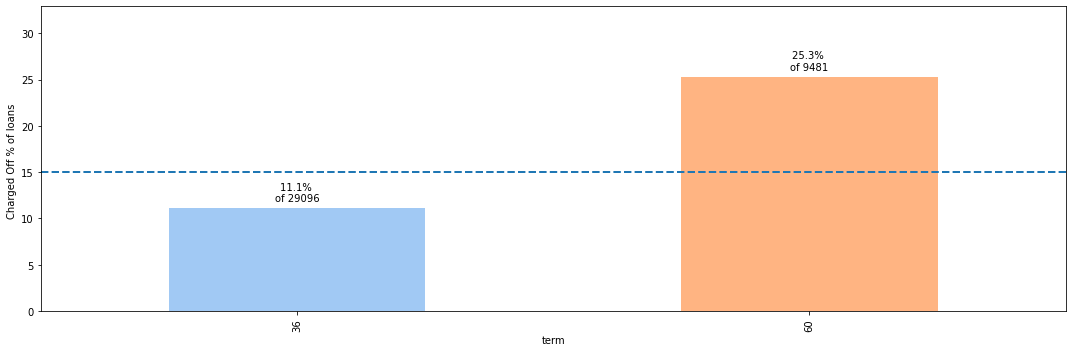

In [100]:
plot_charged_off(loan_df, 'term')

#### Inference : Funded Amount Inv
<li> Loan amount . 
<li> 
<li>  

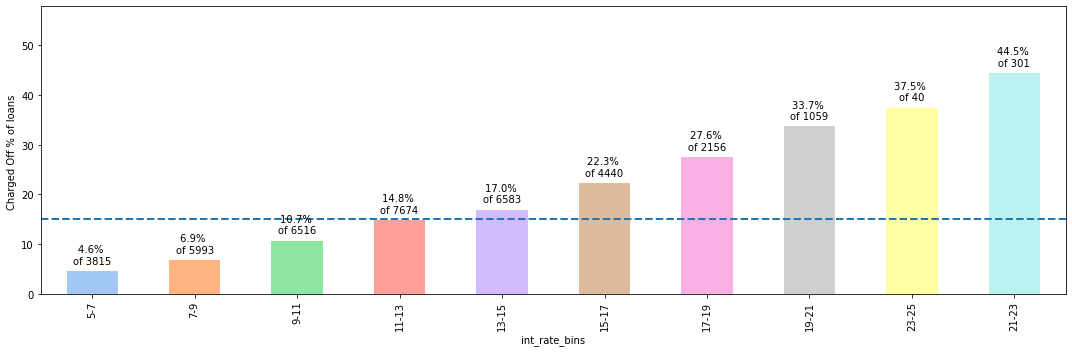

In [101]:
    plot_charged_off(loan_df, 'int_rate_bins')

#### Inference : Interest Rate
<li> Loan amount . 
<li> 
<li>  

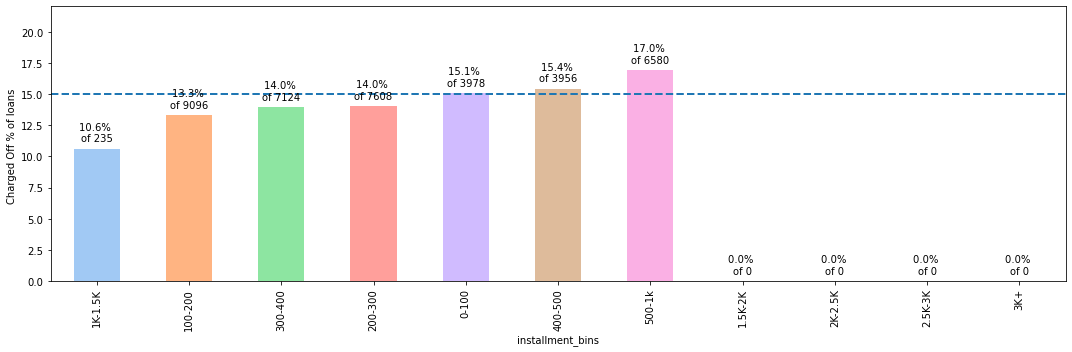

In [102]:
plot_charged_off(loan_df, 'installment_bins')

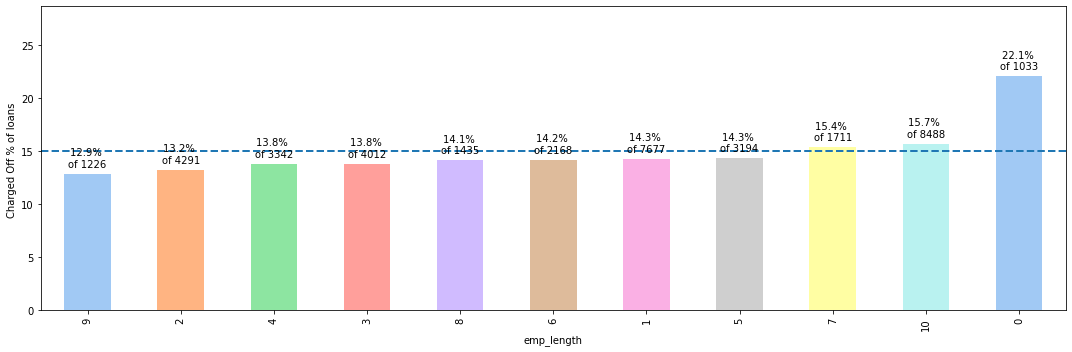

In [103]:
plot_charged_off(loan_df, 'emp_length')

#### Inference : EMployment Length
<li> Loan amount . 
<li> 
<li>  

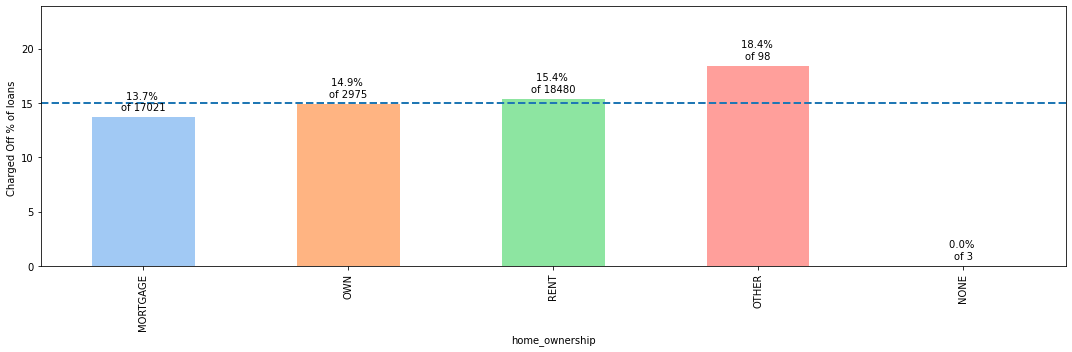

In [104]:
plot_charged_off(loan_df, 'home_ownership')

#### Inference : Home Ownership
<li> Loan amount . 
<li> 
<li> 

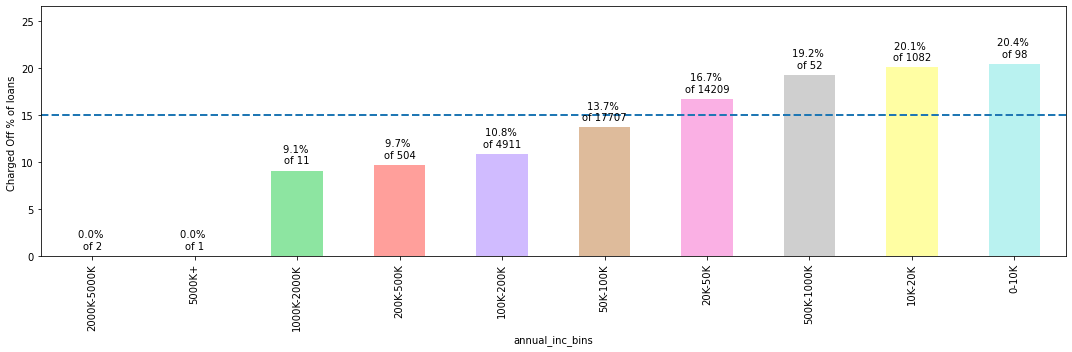

In [105]:
plot_charged_off(loan_df, 'annual_inc_bins')

#### Inference : Annual Income
<li> Loan amount . 
<li> 
<li> 

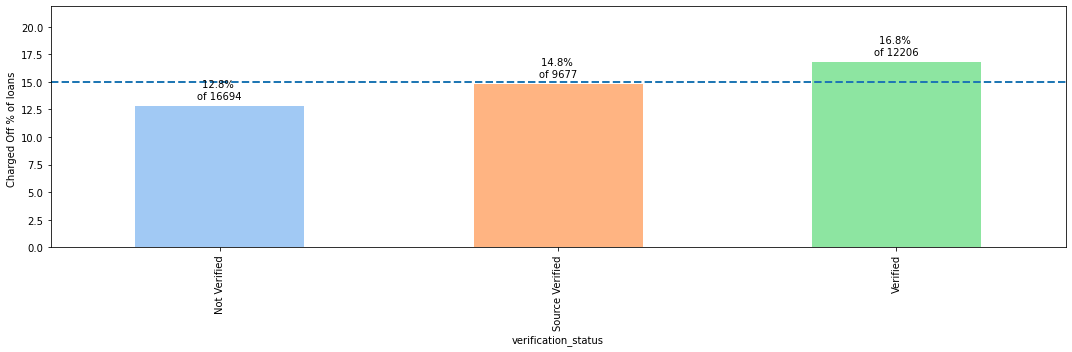

In [106]:
plot_charged_off(loan_df, 'verification_status')

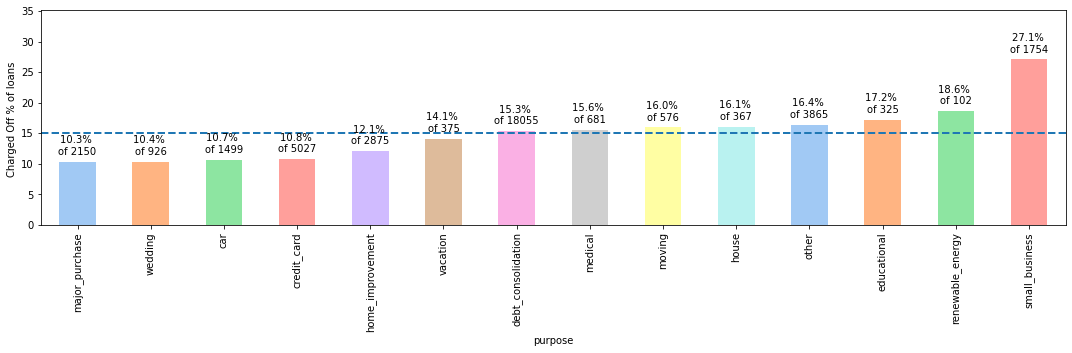

In [107]:
plot_charged_off(loan_df, 'purpose')

In [108]:
loan_df.purpose.sort_values()

17753        car
31310        car
36551        car
19633        car
35059        car
          ...   
6986     wedding
34384    wedding
33448    wedding
1604     wedding
37757    wedding
Name: purpose, Length: 38577, dtype: object

#### Inference : Purpose
<li> Loan amount . 
<li> 
<li> 

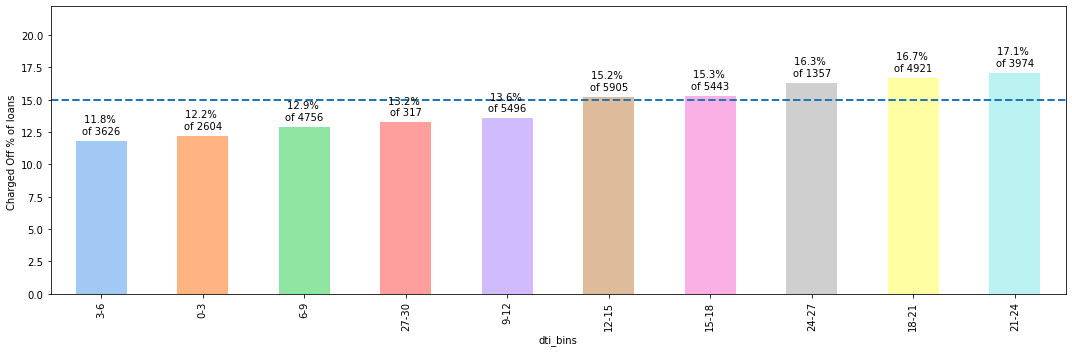

In [109]:
plot_charged_off(loan_df, 'dti_bins')

#### Inference : DTI
<li> Loan amount . 
<li> 
<li> 

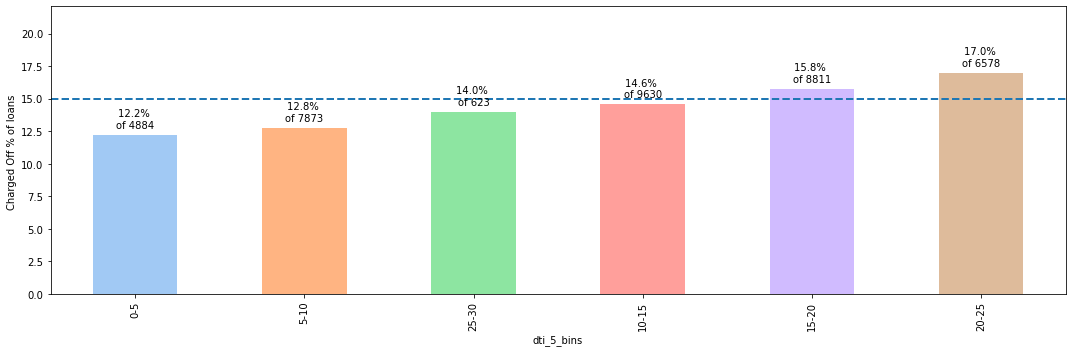

In [110]:
plot_charged_off(loan_df, 'dti_5_bins')

#### Inference : DTI
<li> Loan amount . 
<li> 
<li> 

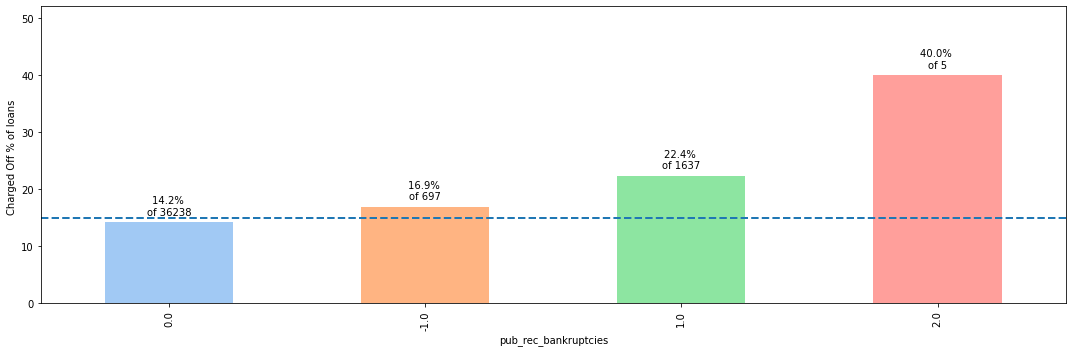

In [280]:
plot_charged_off(loan_df, 'pub_rec_bankruptcies')


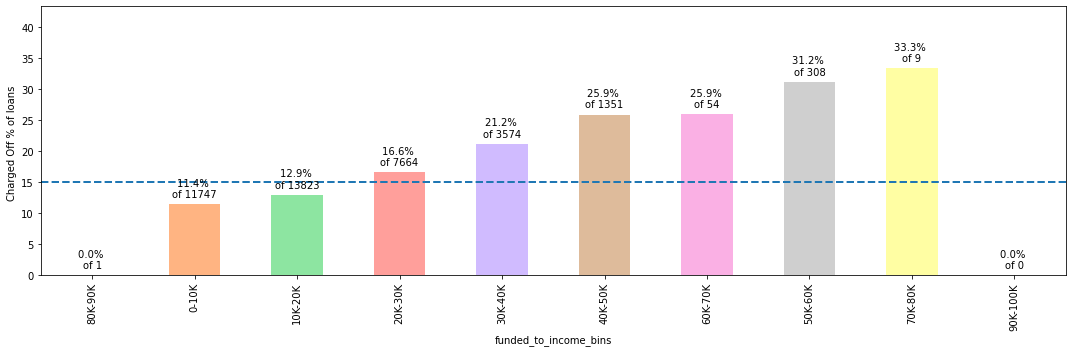

In [111]:
plot_charged_off(loan_df, 'funded_to_income_bins')

## Creating Data_frame with Defaulters for Bi-Variate analysis

In [286]:
risk_loan_df=loan_df.loc[(loan_df.loan_status==1),:]

In [287]:
risk_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 984 to 20428
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              5627 non-null   int64   
 1   funded_amnt            5627 non-null   int64   
 2   funded_amnt_inv        5627 non-null   float64 
 3   term                   5627 non-null   int64   
 4   int_rate               5627 non-null   float64 
 5   installment            5627 non-null   float64 
 6   grade                  5627 non-null   object  
 7   sub_grade              5627 non-null   object  
 8   emp_length             5627 non-null   int64   
 9   home_ownership         5627 non-null   object  
 10  annual_inc             5627 non-null   float64 
 11  verification_status    5627 non-null   object  
 12  loan_status            5627 non-null   int32   
 13  purpose                5627 non-null   object  
 14  addr_state             5627 non-null 

In [290]:
risk_free_loan_df=loan_df.loc[(loan_df.loan_status==0),:]

In [291]:
risk_free_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 14215
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              32950 non-null  int64   
 1   funded_amnt            32950 non-null  int64   
 2   funded_amnt_inv        32950 non-null  float64 
 3   term                   32950 non-null  int64   
 4   int_rate               32950 non-null  float64 
 5   installment            32950 non-null  float64 
 6   grade                  32950 non-null  object  
 7   sub_grade              32950 non-null  object  
 8   emp_length             32950 non-null  int64   
 9   home_ownership         32950 non-null  object  
 10  annual_inc             32950 non-null  float64 
 11  verification_status    32950 non-null  object  
 12  loan_status            32950 non-null  int32   
 13  purpose                32950 non-null  object  
 14  addr_state             32950 non-null 

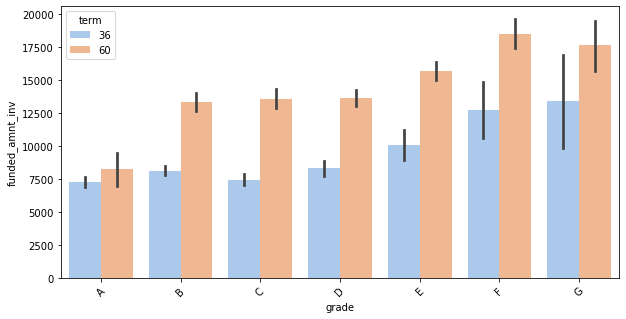

In [342]:

def bivariate_plot(xval,yval,hval,sort=False):    
    plt.figure(figsize=(10, 5))
    if sort==True:
        ax=sns.barplot(x=xval,y=yval,hue=hval,data=risk_loan_df,palette=sns.color_palette('pastel', 16) ,  order=sorted(loan_df[xval].unique()))
    else:
        ax=sns.barplot(x=xval,y=yval,hue=hval,data=risk_loan_df,palette=sns.color_palette('pastel', 16) )
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()
    
bivariate_plot('grade','funded_amnt_inv','term',True)

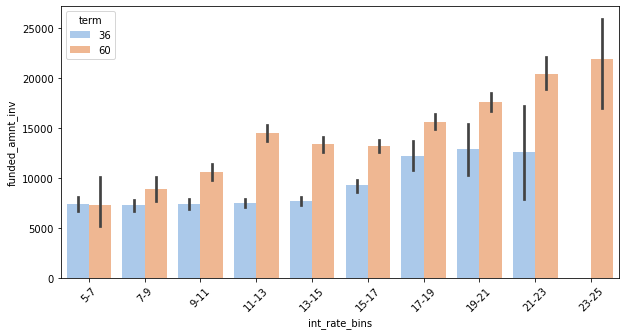

In [343]:
bivariate_plot('int_rate_bins','funded_amnt_inv','term', False)

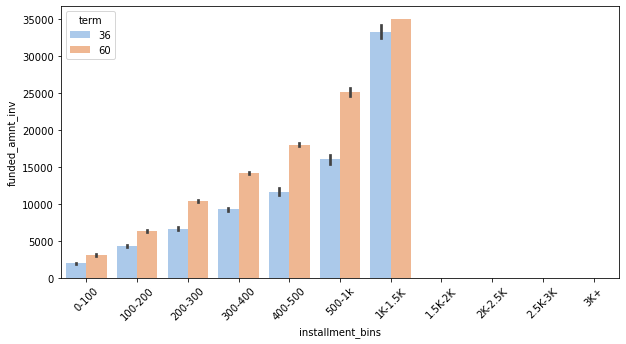

In [345]:
bivariate_plot('installment_bins','funded_amnt_inv','term', False)

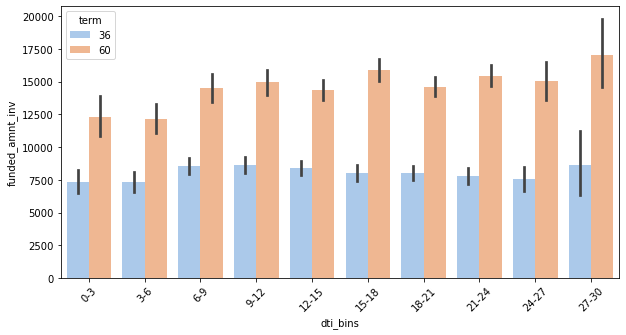

In [346]:
bivariate_plot('dti_bins','funded_amnt_inv','term', False)

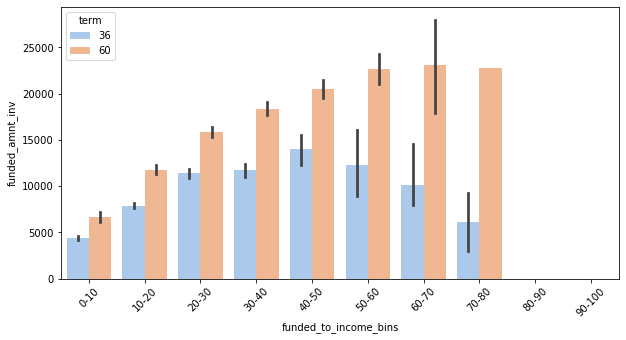

In [347]:
bivariate_plot('funded_to_income_bins','funded_amnt_inv','term', False)

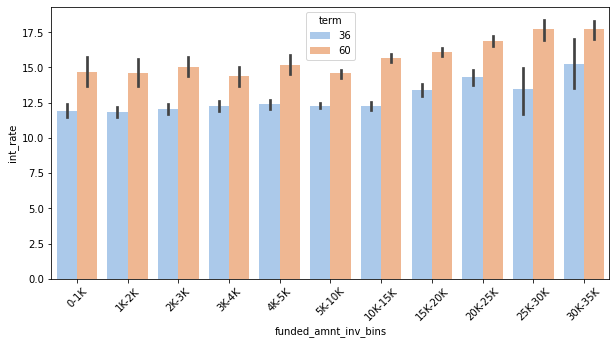

In [349]:
bivariate_plot('funded_amnt_inv_bins','int_rate','term', False)

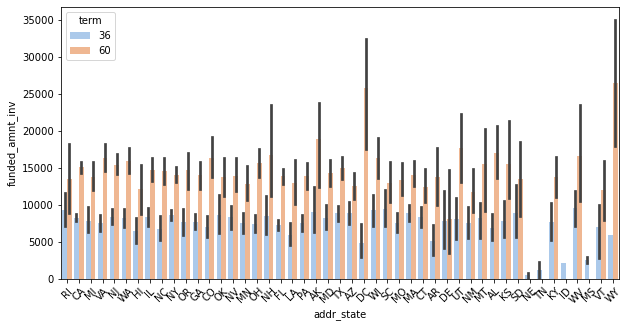

In [359]:
bivariate_plot('addr_state','funded_amnt_inv','term', False)

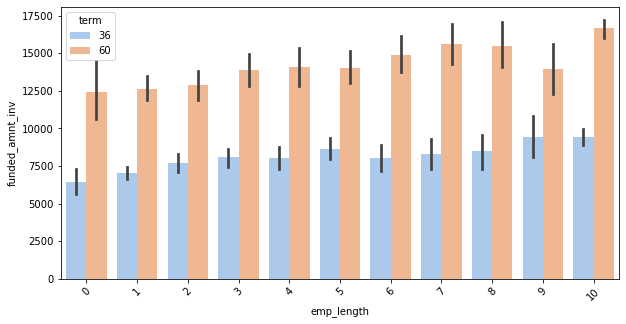

In [352]:
bivariate_plot('emp_length','funded_amnt_inv','term', False)

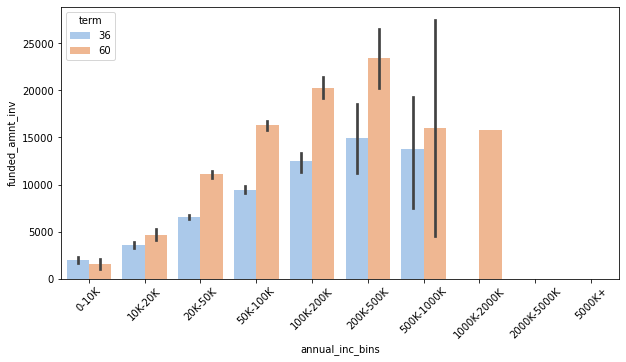

In [353]:
bivariate_plot('annual_inc_bins','funded_amnt_inv','term', False)

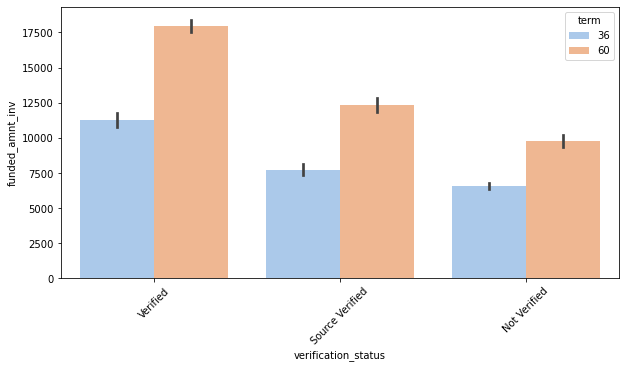

In [357]:
bivariate_plot('verification_status','funded_amnt_inv','term', False)

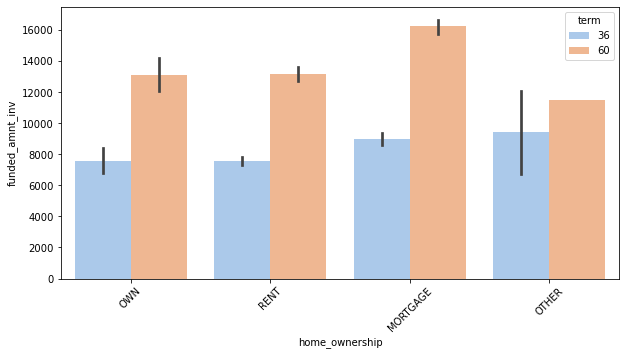

In [358]:
bivariate_plot('home_ownership','funded_amnt_inv','term', False)

## HeatMap

<AxesSubplot:>

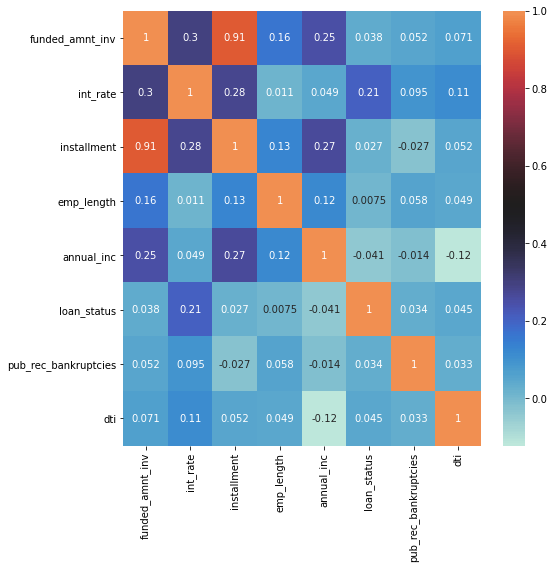

In [281]:
plt.figure(figsize=(8,8))
cont_var= ['funded_amnt_inv', 'int_rate', 'installment','grade','home_ownership',
       'emp_length', 'annual_inc','purpose','loan_status','pub_rec_bankruptcies',
       'dti', 'addr_state']
corr = loan_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5 )